In [1]:
import cv2
import numpy as np
import os
from math import ceil
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
data_dir: str = "/Users/spunk/college/work/chip-imaging/backend/prototyping/sample_data"

In [3]:
data_dir: str = r"C:\Users\Luke\Desktop\chip-imager\chip-imaging\backend\prototyping\sample_data\test1"

In [4]:
def apply_gain(img: np.ndarray, gain: int):
  gainFactor = ceil(np.log10(gain) / np.log10(2))

  # limit pixel brightnesses to ensure multiplying
  # will not overflow
  np.clip(img, 0, 2**(16-gainFactor)-1, out=img)
  np.multiply(img, np.array(gain)
      .astype(np.float64), out=img, casting='unsafe')
  
  # since we specified out=img in each np call, our 
  # original image has been modified

In [5]:
def generate_jpg_from_tiff(directory: str):
  for file_name in os.listdir(directory):
    if file_name.endswith(".TIFF"):
      in_file_path = os.path.join(directory, file_name)
      out_file_path = in_file_path.split(".TIFF")[0] + ".jpeg"
      image = Image.open(in_file_path)
      arr = np.array(image)
      # apply_gain(arr, 40)
      image = Image.fromarray(arr)
      image.mode = 'I'
      image.point(lambda i:i*(1./256)).convert('L').save(out_file_path)

In [7]:
def load_jpg_images(directory: str):
  images = []
  for file_name in os.listdir(directory):
    if file_name.endswith(".jpeg"):
      file_path = os.path.join(directory, file_name)
      image = cv2.imread(file_path)
      # grayimg = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
      images.append(image)
  images = np.array(images)
  return images



In [6]:
generate_jpg_from_tiff(data_dir)

In [8]:
images = load_jpg_images(data_dir)

In [25]:
images[0]

array([[147, 146, 147, ..., 116, 115, 115],
       [146, 146, 142, ..., 136, 136, 133],
       [149, 146, 145, ..., 113, 112, 110],
       ...,
       [139, 141, 142, ..., 137, 132, 135],
       [141, 140, 141, ..., 132, 134, 135],
       [142, 139, 142, ..., 136, 137, 135]], dtype=uint8)

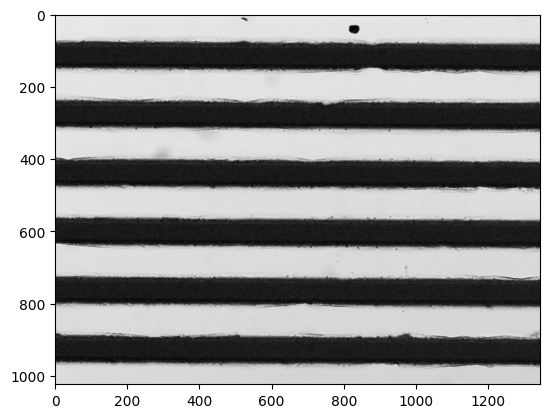

In [26]:
plt.imshow(images[0], cmap='gray')

In [27]:
def stitch_images(images):
  stitcher = cv2.Stitcher_create(cv2.Stitcher_SCANS)
  print(images[0].shape)

  status, result = stitcher.stitch(images)
  if status != cv2.Stitcher_OK:
         print("Can't stitch images, error code = %d" % status)
  
  return result

In [28]:
res = stitch_images(images)

(1024, 1344)


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\stitching\src\seam_finders.cpp:1142: error: (-215:Assertion failed) src[i].channels() == 3 in function 'cv::detail::GraphCutSeamFinder::Impl::find'


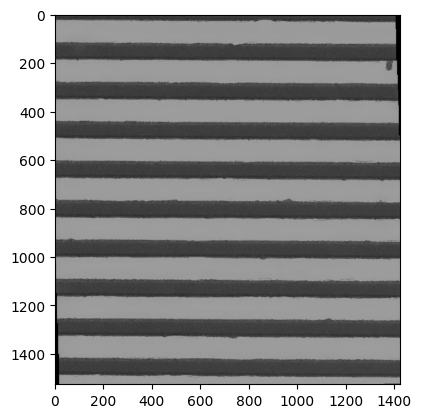

In [18]:
plt.imshow(res)

In [15]:
npres = np.array(res)

In [16]:
npres.shape

(1527, 1424, 3)